In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import yaml
from tqdm import tqdm_notebook

from components import Robot, robot_from_dna

# Import Settings

In [2]:
with open("config.yaml", "r") as yamlfile:
    config = yaml.safe_load(yamlfile)

pop_size = config['pop_size']
num_breeders = config['num_breeders']
num_gen = config['num_generations']
iter_per_sim = config['iterations_per_simulation']
moves_per_iter = config['moves_per_iteration']

# Run Evolution

In [ ]:
# initial population
pop = [Robot() for x in range(pop_size)]
results = []

# run evolution
for i in tqdm_notebook(range(num_gen)):
    scores = np.zeros(pop_size)

    for idx, rob in enumerate(pop):
        score = rob.simulate(iter_per_sim, moves_per_iter)
        scores[idx] = score

    results.append([scores.mean(),scores.max()])

    best_robot = pop[scores.argmax()]

    inds = np.argpartition(scores, -num_breeders)[-num_breeders:]
    old_pop = pop
    pop = []

    for idx in inds:
        pop.append(old_pop[idx])

    scores = scores[inds]

    norm_scores = (scores - scores.min()) ** 2
    norm_scores = norm_scores / norm_scores.sum()

    new_pop = []

    for child in range(pop_size):
        p1, p2 = np.random.choice(pop, p=norm_scores, size=2, replace=False)
        new_pop.append(Robot(p1.dna, p2.dna))

    pop = new_pop

# Visualise Results

In [4]:
# w, x, o = wall, rubbish, empty
best_robot.simulate(1,200,debug=True)

before
start position: 1 7
[['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
 ['w' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'x' 'o' 'o' 'w']
 ['w' 'o' 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'x' 'o' 'w']
 ['w' 'x' 'x' 'x' 'o' 'x' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'x' 'o' 'x' 'o' 'o' 'o' 'x' 'x' 'x' 'w']
 ['w' 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'w']
 ['w' 'o' 'x' 'x' 'o' 'x' 'x' 'o' 'x' 'x' 'o' 'w']
 ['w' 'x' 'o' 'x' 'o' 'x' 'x' 'x' 'o' 'o' 'x' 'w']
 ['w' 'o' 'x' 'o' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'w']
 ['w' 'o' 'x' 'o' 'x' 'o' 'o' 'x' 'o' 'o' 'o' 'w']
 ['w' 'x' 'x' 'x' 'o' 'o' 'o' 'o' 'x' 'x' 'o' 'w']
 ['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']]
after
end position: 10 1
[['w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'o' 'w']
 ['w' 'o' 'o' 'o' 'o' 'o' 'o'

490.0

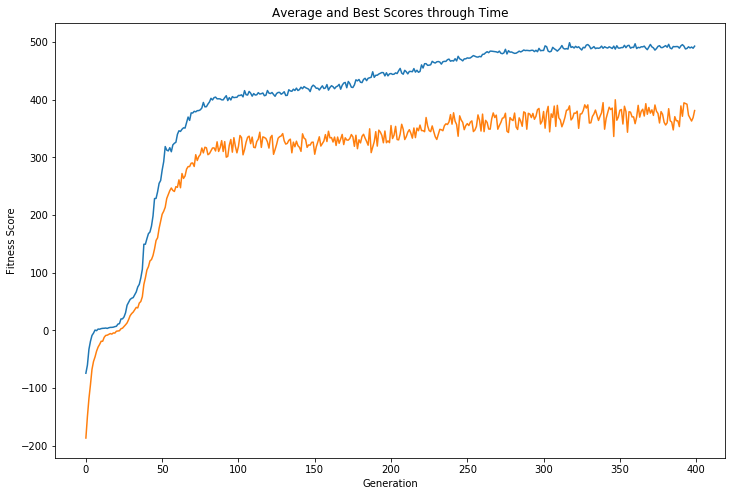

In [5]:
res = np.array(results)
plt.figure(figsize=(12,8))
plt.title('Average and Best Scores through Time')
plt.xlabel('Generation')
plt.ylabel('Fitness Score')
plt.plot(range(400), res[:,1])
plt.plot(range(400), res[:,0])
plt.show()

# Compare with Benchmark
I crafted the dna string below as a benchmark. The strategy is:
* if rubbish is in square, pick it up
* if rubbish is visible, move to that square
* if next to a wall, move away from it
* otherwise move in a random direction

We can see that the robots that "evolved" using the genetic algorithm are superior to my benchmark strategy.

In [16]:
benchmark_dna = '226226336226226336226226226226226336226226336226226226116116116116116116116116116336336336336336336226226226006006336116556336226226226116116116116116116116116116006006006006006006006006006006006006006006006006006006006006006006006006006006006'

test = Robot(benchmark_dna, benchmark_dna, m_rate=0.0)

test_result = test.simulate(100,200)
ga_result = best_robot.simulate(100,200)

print('Benchmark Ave Score:',test_result)
print('Evolved Ave Score:',ga_result)

Benchmark Ave Score: 426.9
Evolved Ave Score: 475.9
